In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [20]:
from PIL import Image
from tqdm import tqdm

#### **Load the Data**

https://www.kaggle.com/datasets/jcprogjava/handwritten-digits-dataset-not-in-mnist

A collection of 107,730 digits in 28x28 PNG format.

In [ ]:
dataset_path = 'dataset'
images = []
labels = []

for dir in os.listdir(dataset_path):
    dir_path = os.path.join(dataset_path, dir, dir)
    if os.path.isdir(dir_path):
        for file in tqdm(os.listdir(dir_path)):
            file_path = os.path.join(dir_path, file)
            image = Image.open(file_path)
            background = Image.new('RGB', image.size, (255, 255, 255))
            background.paste(image, mask=image.split()[3])
            img_gray = background.convert('L')
            img = np.array(img_gray)
            images.append(img)
            labels.append(int(dir))

  0%|          | 0/10773 [00:00<?, ?it/s]

100%|██████████| 10773/10773 [02:28<00:00, 72.36it/s] 


In [42]:
images  = np.array(images)
labels = np.array(labels)

In [61]:
images.shape

(107730, 28, 28)

In [ ]:
len(labels)

dtype('int32')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=42, test_size=0.33)

In [80]:
print(f"X_train : {len(X_train)}, y_train : {len(y_train)}")
print(f"X_test : {len(X_test)}, y_test : {len(y_test)}")

X_train : 72179, y_train : 72179
X_test : 35551, y_test : 35551


**Visualizations**

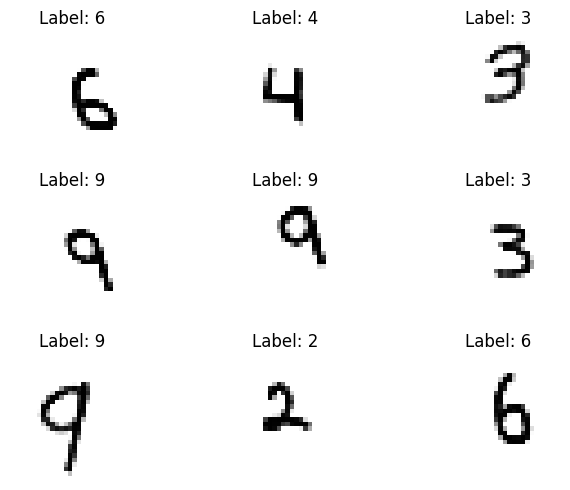

In [81]:
import random

plt.figure(figsize=(7, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    rand = random.randint(0, len(X_train))
    plt.imshow(X_train[rand].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[rand]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **Data Preprocessing**

In [82]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### **Model Building**

In [83]:
model = Sequential([
    Flatten(input_shape=(28,28)),       # Input Layer : Takes the 28x28 array and flattens it
    # tf.keras.Input(shape=(28,28)),
    Dense(units=128, activation="relu",name = 'layer1'),   # Hidden layer
    Dense(units=10, activation="softmax",name = 'layer2')  # Output Layer
])

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [86]:
print(type(X_train), X_train.dtype)
print(type(y_train), y_train.dtype)


<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> int32


#### **Model Training**

In [87]:
model.fit(X_train, y_train, epochs=10,)

Epoch 1/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4592 - loss: 1.6273
Epoch 2/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8239 - loss: 0.5931
Epoch 3/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9207 - loss: 0.2818
Epoch 4/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9595 - loss: 0.1487
Epoch 5/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9735 - loss: 0.0986
Epoch 6/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9803 - loss: 0.0705
Epoch 7/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0472
Epoch 8/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9870 - loss: 0.0415
Epoch 9/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9915 - loss: 0.0302
Epoch 10/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9914 - loss: 0.0291


#### **Model Testing**

In [88]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy :",test_acc)
print("Test Loss :", test_loss)

1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9967 - loss: 0.0142
Test Accuracy : 0.9966807961463928
Test Loss : 0.013377449475228786


In [89]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)

print("Test Accuracy :",train_acc)
print("Test Loss :", train_loss)

2256/2256 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9973 - loss: 0.0118
Test Accuracy : 0.9975893497467041
Test Loss : 0.011648206040263176


#### **Saving Model**

In [90]:
model.save("HandWrittenDigitsClassfication.h5")